In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
from util import show_images
%matplotlib inline


numpy.ndarray

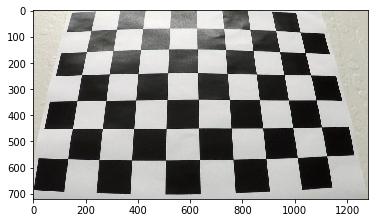

In [5]:
img = mpimg.imread('./camera_cal/calibration3.jpg')
plt.imshow(img)
type(img)

In [6]:
n_rows = 6
n_cols = 9

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (n_cols,n_rows), None)
ret
# plt.imshow(gray)

True

In [20]:
img.shape

(720, 1280, 3)

In [22]:
corners[0]
corners[8] # (n_cols - 1)
corners[5*9] # (n_rows-1 * n_cols)
corners[-1]

array([[ 1022.02966309,    84.68180847]], dtype=float32)

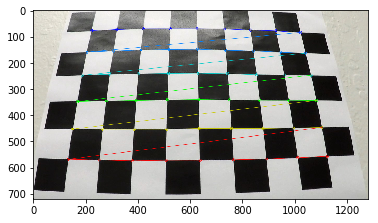

In [9]:
with_corners = cv2.drawChessboardCorners(img, (n_cols,n_rows), corners, ret)
plt.imshow(with_corners)

### Get all mappings from distorted images to object points

In [43]:
image_paths = glob.glob('./camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

n_rows = 6
n_cols = 9

# Create a grid of 3d points
    objp = np.zeros((n_rows*n_cols, 3), np.float32)
    objp[:, :2] = np.mgrid[0:n_cols, 0:n_rows].T.reshape(-1,2)

for image_path in image_paths:
    img = mpimg.imread(image_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n_cols,n_rows), None)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

### Callibrate Camera

In [57]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None)

### Undistort Image

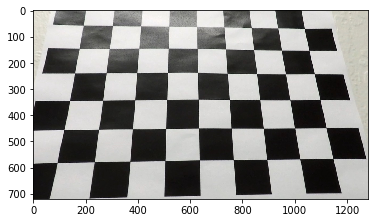

In [52]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

### Test Distortion Correction on an Image

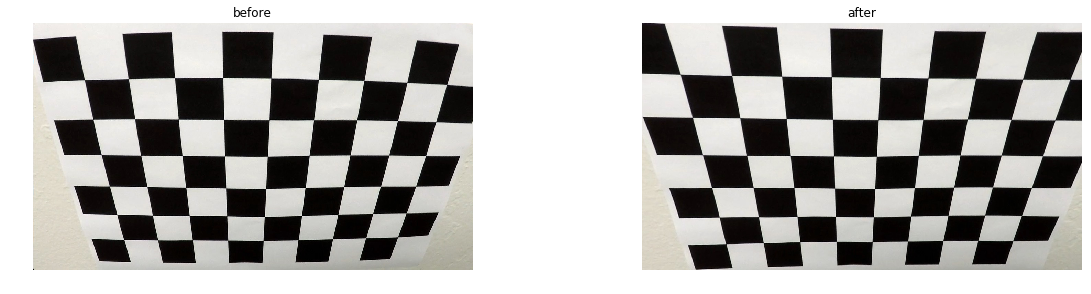

In [13]:
from distortion_correction import DistortionCorrection, path_to_image_gen
import matplotlib.image as mpimg
from collections import OrderedDict

n_rows = 6
n_cols = 9
chessboard_paths = glob.glob('./camera_cal/calibration*.jpg')
chessboards = path_to_image_gen(chessboard_paths)
distortion_correction = DistortionCorrection()
distortion_correction.fit_to_chessboards(chessboards, n_rows, n_cols)

test_correction_img = mpimg.imread('./camera_cal/calibration2.jpg')
corrected = distortion_correction.transform(test_correction_img)
show_images(OrderedDict([
    ('before', test_correction_img),
    ('after', corrected)
]))

### Test Distortion Correction on all images

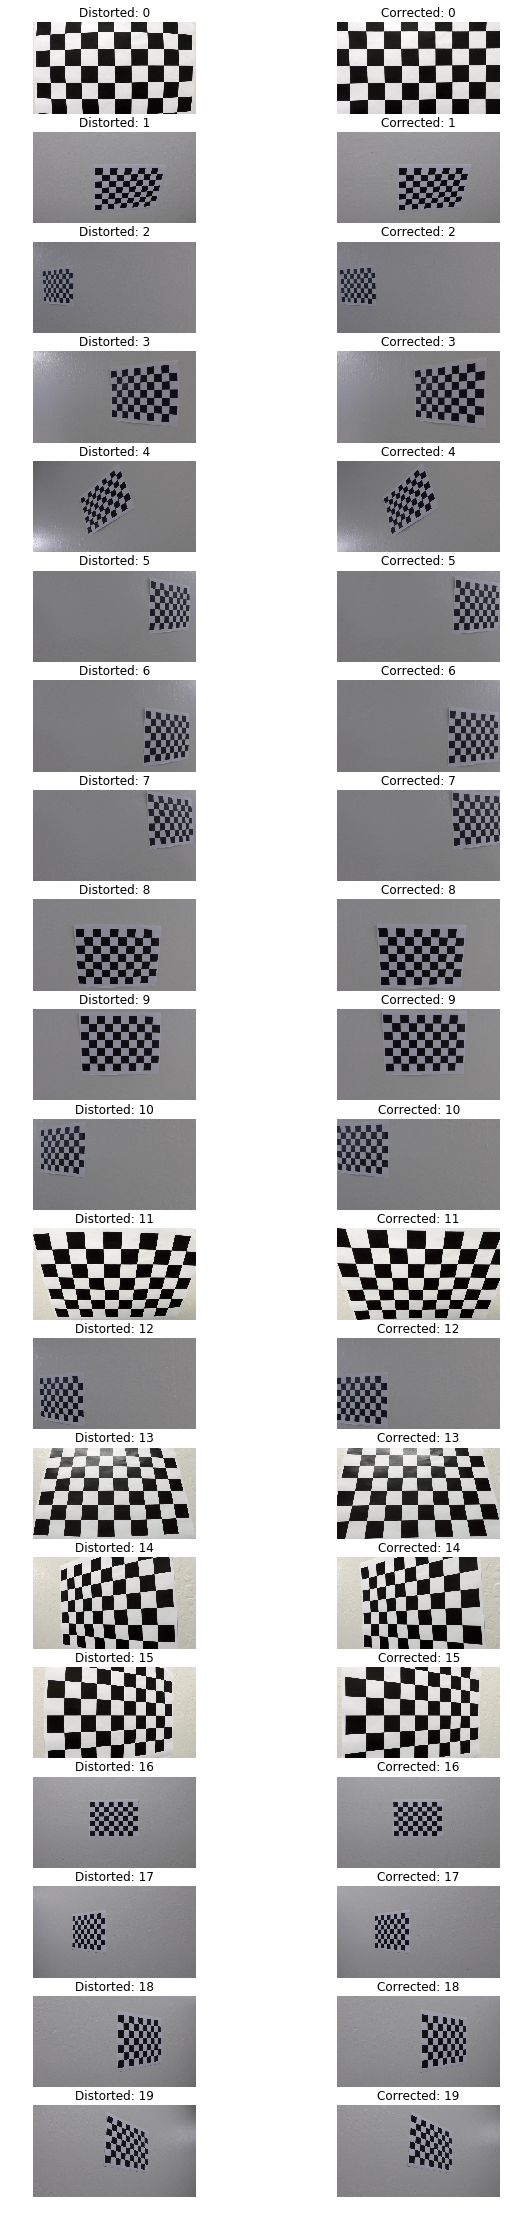

In [9]:
import matplotlib.gridspec as gridspec

image_paths = glob.glob('./camera_cal/calibration*.jpg')
gs = gridspec.GridSpec(len(image_paths), 2)

plt.figure(figsize=(10, 40))

for ii, path in enumerate(image_paths):
    distorted = mpimg.imread(path)
    corrected = distortion_correction.transform(distorted)
    
    ax = plt.subplot(gs[2*ii])
    ax.set_title("Distorted: " + str(ii))
    ax.axis('off')
    ax.imshow(distorted)
    
    ax = plt.subplot(gs[2*ii + 1])
    ax.set_title("Corrected: " + str(ii))
    ax.axis('off')
    ax.imshow(corrected)